In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
# reading cleaned dataset

home_df= pd.read_csv("../dataframes/cleaned_df.csv")

In [4]:
# Top 5 rows

home_df.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
1,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
2,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
3,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70
4,0xbe4e,Single-family home,1185,3.0,3,Unfurnished,0.0,No,Once in a day - Morning,5.69,Well below average,Medium,91.0,4.49,82.94


In [51]:
def nan_check(df):
    return round((100*df.isnull().sum())/len(df),2)

In [52]:
nan_check(home_df)

Property_ID               0.0
Property_Type             0.0
Property_Area             0.0
Number_of_Windows         0.0
Number_of_Doors           0.0
Furnishing                0.0
Frequency_of_Powercuts    0.0
Power_Backup              0.0
Water_Supply              0.0
Traffic_Density_Score     0.0
Crime_Rate                0.0
Dust_and_Noise            0.0
Air_Quality_Index         0.0
Neighborhood_Review       0.0
Habitability_score        0.0
dtype: float64

## Mapping(Label Encoding)

In [53]:
df1 = home_df.copy()

In [54]:
home_df.Furnishing.value_counts()

Semi_Furnished     17204
Unfurnished         8662
Fully Furnished     6494
Name: Furnishing, dtype: int64

In [55]:
df1.Furnishing = home_df.Furnishing.map({"Unfurnished":0,"Semi_Furnished":1,"Fully Furnished":2})

In [56]:
home_df.Power_Backup.value_counts()

No     24838
Yes     7522
Name: Power_Backup, dtype: int64

In [57]:
df1.Power_Backup = df1.Power_Backup.map({"No":0,"Yes":1})

In [58]:
home_df.Crime_Rate.value_counts()

Well below average        16240
Slightly below average     9729
Slightly above average     4422
Well above average         1969
Name: Crime_Rate, dtype: int64

In [59]:
df1.Crime_Rate = home_df.Crime_Rate.map({"Well below average":0,"Slightly below average":1,"Slightly above average":2,"Well above average":3})

In [60]:
home_df.Dust_and_Noise.value_counts()

Medium    27877
High       2737
Low        1746
Name: Dust_and_Noise, dtype: int64

In [61]:
df1.Dust_and_Noise = home_df.Dust_and_Noise.map({"Low":0,"Medium":1,"High":2})

In [62]:
df1.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x68d4,Apartment,733,2.0,2,0,1.0,0,Once in a day - Evening,4.37,0,1,96.0,3.55,71.20
1,0x7d81,Apartment,737,4.0,2,2,0.0,0,Once in a day - Morning,7.45,1,1,121.0,3.81,71.39
2,0x7a57,Apartment,900,3.0,2,0,2.0,1,Once in a day - Morning,6.16,3,1,100.0,1.34,31.46
3,0x9409,Bungalow,2238,14.0,6,2,0.0,0,All time,5.46,0,1,116.0,4.77,93.70
4,0xbe4e,Single-family home,1185,3.0,3,0,0.0,0,Once in a day - Morning,5.69,0,1,91.0,4.49,82.94


## Outliers



In [111]:
# Function which remove outliers using normal distribution

def cap_outliers(df,feature):
    c = 0
    df_out=pd.DataFrame()
    for key,subset in df.groupby('Property_Type'):
        
        mu=np.mean(subset[feature])
        sigma=np.std(subset[feature])
        
        retained_df=subset[(subset[feature]>(mu-1*sigma)) & (subset[feature]<(mu+1*sigma))]
        
        df_out=pd.concat([df_out,retained_df],ignore_index=True)
    return df_out



In [112]:
df1['Property_Area'].describe([.10,.80,.90,.95,.99])

count    32360.000000
mean      1393.565637
std       1947.693451
min        100.000000
10%        286.000000
50%        932.000000
80%       1962.000000
90%       2380.100000
95%       3534.000000
99%      10909.230000
max      28057.000000
Name: Property_Area, dtype: float64

C:\Users\Nirbhay Arora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

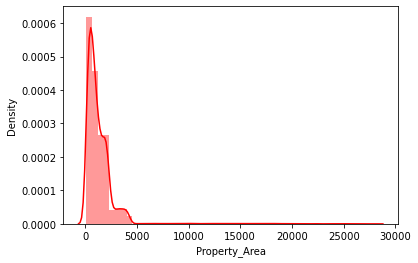

In [113]:
sb.distplot(df1['Property_Area'],color='red')


In [114]:
# Calling function on "Property_Area"

df2=cap_outliers(df1,"Property_Area")

In [117]:
print(len(df1))
print(len(df2))

32360
31839


C:\Users\Nirbhay Arora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

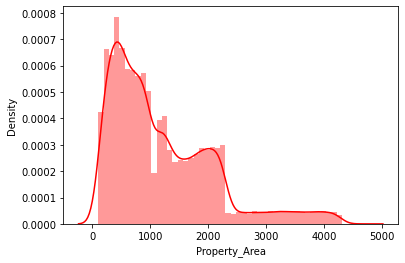

In [119]:
sb.distplot(df2['Property_Area'],color='red')

In [120]:
df2['Air_Quality_Index'].describe([.10,.80,.90,.95,.99])

count    31839.000000
mean       121.298470
std         61.602141
min          0.000000
10%         84.000000
50%        113.000000
80%        147.000000
90%        161.000000
95%        168.100000
99%        199.000000
max       1044.000000
Name: Air_Quality_Index, dtype: float64

C:\Users\Nirbhay Arora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Air_Quality_Index', ylabel='Density'>

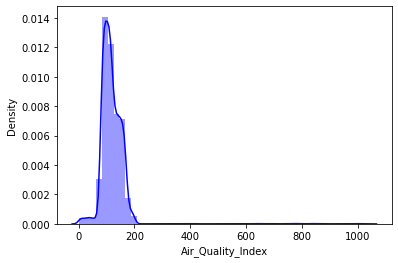

In [121]:
sb.distplot(df2['Air_Quality_Index'],color='blue')


In [122]:
# Calling Function on 'Air_Quality_Index'

df3=cap_outliers(df2,'Air_Quality_Index')

In [123]:
print(len(df2))
print(len(df3))

31839
30283


C:\Users\Nirbhay Arora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Air_Quality_Index', ylabel='Density'>

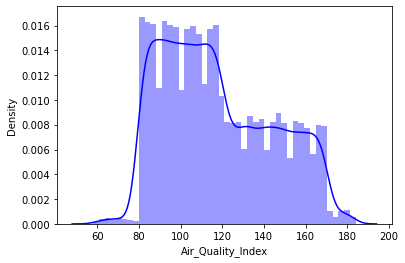

In [124]:
sb.distplot(df3['Air_Quality_Index'],color='blue')

## One Hot Encode

In [125]:
prop_dummy=pd.get_dummies(df3['Property_Type'])

prop_dummy = prop_dummy.drop('Apartment',axis=1)

In [126]:
df4=pd.concat([df3,prop_dummy],axis=1)
df4.drop('Property_Type',axis=1,inplace=True)

In [127]:
water_dummy=pd.get_dummies(df4['Water_Supply'])

water_dummy = water_dummy.drop('All time',axis=1)

In [128]:
df5=pd.concat([df4,water_dummy],axis=1)
df5.drop('Water_Supply',axis=1,inplace=True)

In [129]:
df5.head()

,Property_ID,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Bungalow,Container Home,Duplex,Single-family home,Once in a day - Evening,Once in a day - Morning,Once in two days
0,0x68d4,733,2.0,2,0,1.0,0,4.37,0,1,96.0,3.55,71.20,0,0,0,0,1,0,0
1,0x7d81,737,4.0,2,2,0.0,0,7.45,1,1,121.0,3.81,71.39,0,0,0,0,0,1,0
2,0x7a57,900,3.0,2,0,2.0,1,6.16,3,1,100.0,1.34,31.46,0,0,0,0,0,1,0
3,0xb0fb,159,2.0,2,1,0.0,1,6.77,0,1,90.0,4.48,80.65,0,0,0,0,0,1,0
4,0xaf2f,521,1.0,2,1,0.0,0,4.14,0,1,89.0,4.82,73.51,0,0,0,0,0,0,0


##### Now , our all data turns into numerical

## Saving

In [134]:
df5.to_csv("../dataframes/mapped_df.csv",index=False)